### importação dos pacotes


In [41]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Limpeza e Análise de Dados de Vendas

In [42]:
import pandas as pd
import numpy as np
import random

# Definindo os parâmetros
num_dados = 500
data_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E', 'Produto F']
categorias = ['Categoria 1', 'Categoria 2', 'Categoria 3']

# Gerando os dados
np.random.seed(2)  # Para reprodutibilidade
random.seed(2)

dados = []

for i in range(num_dados):
    data = random.choice(data_range)
    quantidade = random.randint(1, 20)
    categoria = random.choice(categorias)
    preco = round(random.uniform(10.0, 100.0), 2)

    # Aumentar as vendas em novembro e dezembro
    if data.month in [11, 12]:
        quantidade *= 2  # Dobrar a quantidade, pois na Black Friday e Natal as vendas aumentam
    
    # Fazer com que cada produto pertença a uma categoria específica,ou seja o mesmo produto não pode estar em categorias diferentes. Pois imagino que cada produto pertença a uma categoria específica, por exemplo, um produto de limpeza não pode estar na categoria de alimentos.
    if categoria == categorias[0]:
        produto =  random.choice(produtos[:2])
    elif categoria == categorias[1]:
        produto =  random.choice(produtos[2:4])
    else:
        produto =  random.choice(produtos[4:])
        
    dados.append([i, data, produto, categoria, quantidade, preco])

# Cria o DataFrame
df = pd.DataFrame(dados, columns=['ID', 'Data', 'Produto', 'Categoria', 'Quantidade', 'Preço'])


### adicinando valores faltantes para poder exemplificar a limpeza

In [43]:
df.loc[5, 'Produto'] = np.nan
df.loc[10, 'Quantidade'] = np.nan
df.loc[15, 'Preço'] = np.nan
df.loc[20, 'Categoria'] = np.nan
df.loc[25, 'Data'] = np.nan

#quantidade de dados nulos
df.isnull().sum()

ID            0
Data          1
Produto       1
Categoria     1
Quantidade    1
Preço         1
dtype: int64

### tratando os valores faltantes

In [44]:
# Remover linhas onde Produto ou Data são nulos
df = df.dropna(subset=['Produto', 'Data'])

# Preencher valores faltantes em Quantidade com a média
df['Quantidade'] = df['Quantidade'].fillna(df['Quantidade'].mean())

# Preencher valores faltantes em Preço com a média
df['Preço'] = df['Preço'].fillna(df['Preço'].mean())

# Preencher valores faltantes em Categoria com Não informado
df['Categoria'] = df['Categoria'].fillna('Não informado')

# Remoção de duplicatas
df = df.drop_duplicates()

#quantidade de dados nulos
df.isnull().sum()

ID            0
Data          0
Produto       0
Categoria     0
Quantidade    0
Preço         0
dtype: int64

### conversão de tipos

In [45]:
df['ID'] = df['ID'].astype(int)
df['Quantidade'] = df['Quantidade'].astype(int)
df['Preço'] = df['Preço'].astype(float)
df['Categoria'] = df['Categoria'].astype('category')

# Salvando o dataframe limpo em um arquivo csv
df.to_csv('data_clean.csv', index=False)

#mostra o dataframe limpo
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,0,2023-01-29,Produto A,Categoria 1,3,42.50
1,1,2023-12-09,Produto C,Categoria 2,20,64.53
2,2,2023-10-25,Produto D,Categoria 2,6,67.46
3,3,2023-10-06,Produto E,Categoria 3,15,34.14
4,4,2023-01-15,Produto D,Categoria 2,12,93.87


### Análise de Dados de Vendas

In [46]:
#total de vendas por produto
df['Total_vendas'] = df['Quantidade'] * df['Preço']

#agrupamento por produto, somando as vendas e ordenando pela maior venda para localizar o produto com maior e menor venda
tot_vendas_prod = df.groupby('Produto')['Total_vendas'].sum().sort_values(ascending=False)

#produto com maior venda
prod_mais_vendido = tot_vendas_prod.index[0]
qtd_maior_venda = tot_vendas_prod.iloc[0]

print(f"O produto mais vendido foi o {prod_mais_vendido}, com um total de vendas de R${qtd_maior_venda:.2f}")

O produto mais vendido foi o Produto E, com um total de vendas de R$66998.40


# 2.Análise Exploratória de Dados de Vendas

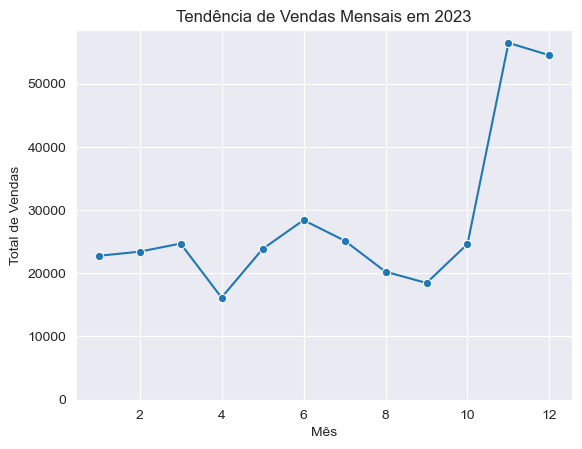

In [47]:
# Adicionando colunas para ano e mês
df['Mes'] = df['Data'].dt.month

# Total de vendas por mês
vendas_mes = df.groupby('Mes')['Total_vendas'].sum().reset_index()

# Gráfico de linhas mostrando a tendência de vendas ao longo do tempo
sns.lineplot(data=vendas_mes, x='Mes', y='Total_vendas', marker='o')
plt.title('Tendência de Vendas Mensais em 2023')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.ylim(0) # Garantir que o eixo y comece em 0, pois pode distorcer a visualização
plt.grid(True) # Adicionar grade para facilitar a leitura
plt.show()

### padrões e insights

In [48]:
# ordenando os dados para identificar o mês de maior e menor vendas
vendas_mes = vendas_mes.sort_values('Total_vendas',ascending = False)

# mes de menos venda
mes_menor_venda = vendas_mes['Mes'].iloc[-1]
tot_vendas_menor_mes = vendas_mes['Total_vendas'].iloc[-1]
# mes de mais venda
mes_maio_venda = vendas_mes['Mes'].iloc[0]
tot_vendas_maior_mes = vendas_mes['Total_vendas'].iloc[0]

print(f"O mês com menor volume de vendas foi o mês {mes_menor_venda}, com um total de vendas de R${tot_vendas_menor_mes:.2f}")
print(f"O mês com maior volume de vendas foi o mês {mes_maio_venda}, com um total de vendas de R${tot_vendas_maior_mes:.2f}")

O mês com menor volume de vendas foi o mês 4, com um total de vendas de R$16155.82
O mês com maior volume de vendas foi o mês 11, com um total de vendas de R$56441.68


## Insights e Padrões Observados



##### Insight 1: Mês com o Maior Número de Vendas
- **Mês:** Novembro
- **Total de Vendas:** R$56441.68

**Análise:**
- Novembro apresenta o maior volume de vendas, possivelmente devido a eventos como o Natal e outras festividades de fim de ano, que tradicionalmente aumentam a demanda por produtos.
- A black friday também contribuiu muito para o aumento das vendas nesse mês.
---
##### Insight 2: Mês com o Menor Número de Vendas
- **Mês:** Abril
- **Total de Vendas:** R$16155.82

**Análise:**
- Abril registrou o menor volume de vendas, o que pode ser atribuído à ausência de produtos que mais vendem na pascoa, como por exemplo chocolates. Assim essa data pode ser um fator que influencia a baixa nas vendas.
- Este padrão pode indicar a necessidade de estratégias de marketing mais agressivas durante os períodos de baixa demanda para equilibrar as vendas ao longo do ano, ou controlar o estoque sabendo que nessa data as vendas serão menores.